# Assessment Outline:



You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.    
Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python(No EXCEL or Similar Technologies)  
The companies CTO also requires you to rationalize all the decisions that you have made in Poster that displays your visualizations.    
This rationalization MUST include your visualization design decisions for your visualizations, feature selection and any other information that you deem relevant.   

<br>

You are required to use the dataset contained within the file “vgsales.csv” and then answer the following questions using a different visualization type (eg. Bar Chart, Scatter graph etc…) for each question:

<br>

*	What are the top 5 games by global sales?   
*	What is the distribution of the most popular 4 game genres?  
*	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
*	What are the 3 most common “developer” in the dataset?  

<br>

Your project must incorporate the following elements:


A Jupyter Notebook detailing your:
*	EDA process
*	Data Cleaning
*	Feature Selection
*	Data Visualizations

# Assessment

## Exploratory Data Analysis

### Part One: Overview & Structure

#### Import Libraries & DataSet

In [44]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
warnings.filterwarnings('ignore')

# Show plots inside notebook
%matplotlib inline

# Style
sns.set(style="whitegrid")

# Calculate means for visualisation
from numpy import mean
import matplotlib.patches as mpatches

I import the essential Python libraries for data handling and visualization.

* `pandas` and `numpy` will help me explore the data structurally.

* `matplotlib` and `seaborn` will allow me to create visual summaries.

* `%matplotlib inline` to show plots within the notebook.

This setup is standard for performing EDA tasks in line with Ahmed (2025a).

In [2]:
# Load the dataset
vgsales = pd.read_csv('vgsales.csv')

#### View sample records

*   Preview first 5 rows of the dataset
*   Display column types, non-null counts, and memory usage
*   Get summary statistics for numerical columns

In [3]:
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vgsales.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


**Why?**

Viewing the top and bottom of the dataset gives me a sense of how the data looks. It helps spot inconsistencies, entry errors, or formatting issues early on

#### Inspect Data Types

In [5]:
vgsales.dtypes

,0
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


**Why?**

I use `.dtypes` to check what types each column. This is imprtant because sometimes the data can be misread. For example sometimes numbers are read as text abd dates might be recognised correctly. It helps catch these issues before cleaning the data (Ahmed, 2024a).

#### Dataset Summary Information

In [6]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


**Why?**

I also use `.info()` right after to see the number of non-null values, data types, and memory usage. It gives a clearer picture of the dataset's structure and helps spot any missing values (Ahmed, 2024a).

#### Dataset Shape

In [7]:
print("Rows and columns in the dataset:", vgsales.shape)

Rows and columns in the dataset: (16719, 16)


**Why?**

I check the size of the dataset using `.shape` to inderstand how big it is. A small dataset might not need that much complex analysis, but a large one could need a lot more detailed work.

#### Summary Statistics

In [8]:
vgsales.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


**Why?**
I use `.describe(include='all')` to get summary information for all columns. This shows me things like counts for categories, min/max values, and averages for numbers. It helps me see how the data is spread out, spot outliers, and find any issues (Ahmed, 2024a).


#### Checking for Missing Values

In [9]:
print("Missing values in each column:")
vgsales.isnull().sum()

Missing values in each column:


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


**Why?**

Finding missing values now rather than later is important. This is because I can decide whether I should fill them in, remove them, or mark them during cleaning. Knowing how many are missing helps me plan what to do next (Ahmed, 2024a).

#### Checking for Duplicates

In [10]:
duplicates = vgsales[vgsales.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


**Why?**

Duplicate entries can mess up the results of summaries and models. Doing this just checks if there are any without removing anything yet

### Part Two: Visual Analysis

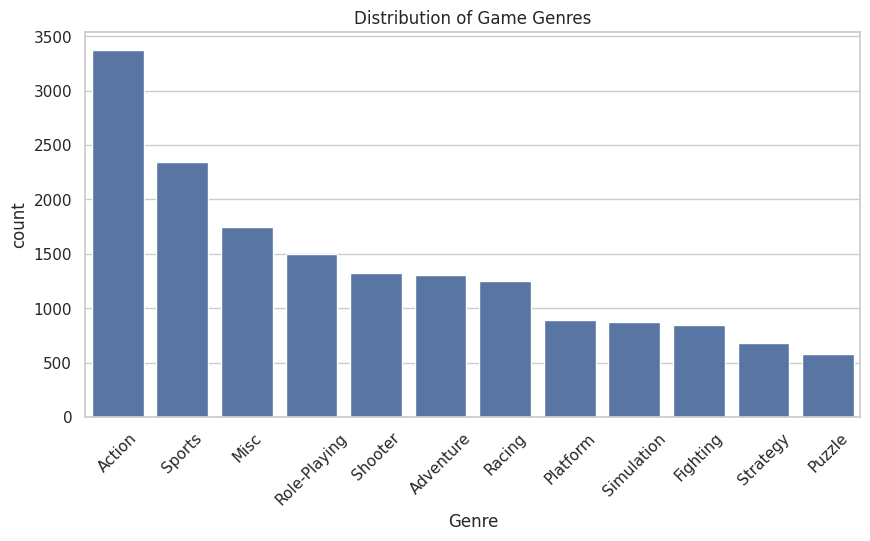

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=vgsales, x='Genre', order=vgsales['Genre'].value_counts().index)
plt.title('Distribution of Game Genres')
plt.xticks(rotation=45)
plt.show()

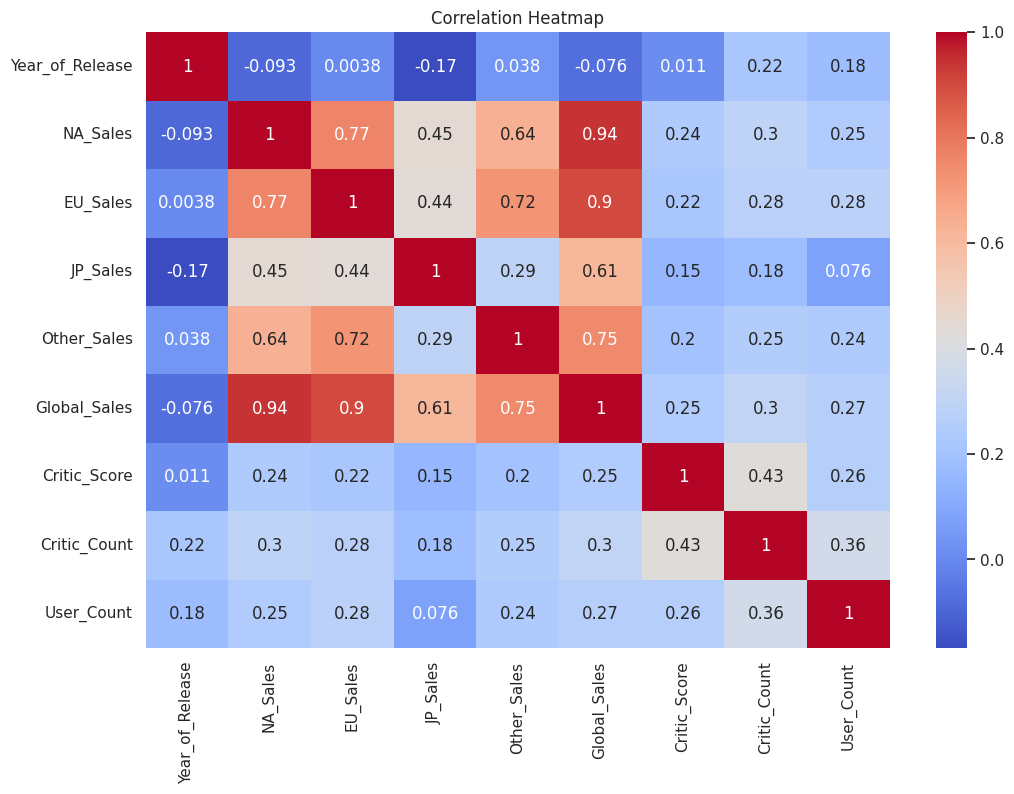

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(vgsales.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

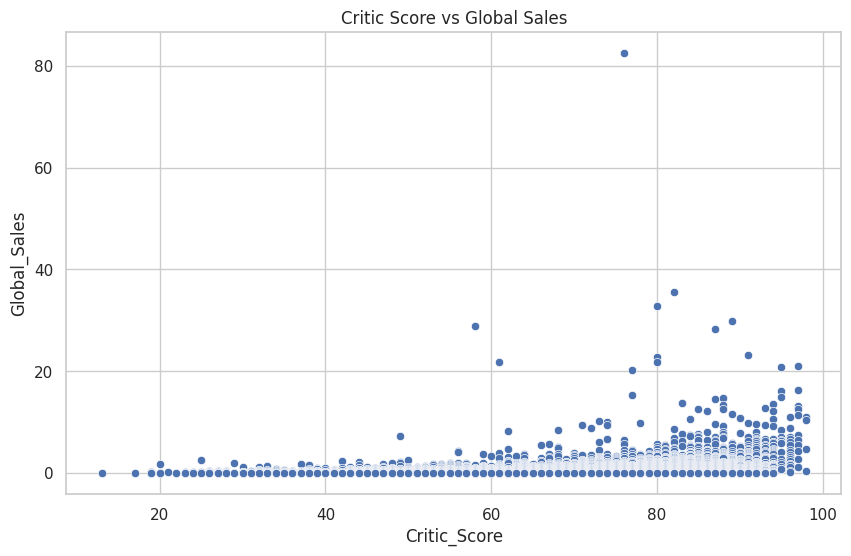

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=vgsales, x='Critic_Score', y='Global_Sales')
plt.title('Critic Score vs Global Sales')
plt.show()

## Data Cleaning

In this section, I will clean the dataset to prepare it for analysis.

What I do here:
- Make a safe copy of the data
- Check for duplicate rows
- Look for missing values and handle them
- Drop columns I don’t need
- Fix any formatting issues

Once this is done, the dataset will be clean, consistent, and ready to use in the next steps.

### Create Copy

In [14]:
vgsales_clean = vgsales.copy()

**Why?**

 I create a copy of the dataset before making any changes. This is because it makes it easier to compare before and after cleaning. It also helps me have an unclean dataset that I can refer to if mistakes are made. This is a precautionary good practice (Ahmed, 2024b)


### Dataset Shape

In [15]:
print("Original shape of dataset:", vgsales.shape)

Original shape of dataset: (16719, 16)


**Why?**

Knowing the dataset's shape before cleaning helps track how much data is lost or retained during the cleaning steps. It’s important to document the impact of each operation (Ahmed, 2024b)

### Check for duplicates in the dataset

In [16]:
if vgsales_clean.duplicated().sum() > 0:
    print("Duplicate Rows Preview:")
    print(vgsales_clean[vgsales_clean.duplicated()].head())
else:
    print("No duplicate rows found.")

print(f'Number of duplicate rows: {vgsales_clean.duplicated().sum()}')


No duplicate rows found.
Number of duplicate rows: 0


**Why?**

I check for duplicates to make sure there aren't any in the dataset. Even though I didn’t find any here, it’s good to check because just one duplicate could mess up the results or make things look off in graphs (Ahmed, 2024b).

Duplicates can mess with stats or charts. If I do find duplicates, I check how many there are and look at a few to see what's repeated. Finding them is the first step before deciding whether to remove them (Ahmed, 2024b).

### Missing Values

#### Check for missing values

In [17]:
print('Missing values per column:')
print(vgsales_clean.isnull().sum())

Missing values per column:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


#### Percentage of Missing Values

In [18]:
print("\nPercentage of missing values:")
print((vgsales_clean.isnull().sum() / len(vgsales_clean)) * 100)


Percentage of missing values:
Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


#### Unique Values

In [19]:
print("\nUnique values per column:")
print(vgsales_clean.nunique())


Unique values per column:
Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64


### Why?

**Missing Data**


I do this to make sure data gaps does NOT affect how my model works.

Missing data can mess up my model training and evaluation which would lead to wrong predictions. By checking how many values are missing in each coilumn, I can decide on the best way to handke them. I can do this by filling, dropping, or replacing so that the final dataset is complete and reliable.

Finding missing values is key to keeping the data quality high. Missing data can lower the quality, which impacts model performance. According to Ahmed (2025c), collecting good data and improving features are important for effective classification. Ahmed (2025d) also points out that reliable predictions need accurate data, and missing info can lead to unreliable results. That’s why I make sure to check and fix any missing values to keep my data consistent.

<br>

**Percentage of missing values**

I also look at the number of unique values per column to understand how diverse or categorical each feature is. This helps me judge whether a column is useful for analysis. For example, a column with very few unique values and a lot of missing data is less likely to be helpful (Ahmed, 2024b).

<br>

**Unique Values**

The number of unique values per column to understand how diverse or categorical each feature is. This helps me judge whether a column is useful for analysis. For example, a column with very few unique values and a lot of missing data is less likely to be helpful (Ahmed, 2024b).


#### Drop

In [20]:
vgsales_clean = vgsales_clean.dropna(subset=['Name', 'Genre'])

In [21]:
vgsales_clean = vgsales_clean.dropna(subset=['Publisher'])

In [22]:
vgsales_clean.drop(['Rating', 'User_Count', 'Critic_Score', 'Critic_Count'], axis=1, inplace=True)

**Why?**

I drop columns or rows when there is only a small amount of missing data or it's not not needed to answer the assessment. For example, `Name` is essential for identifying games and only has 2 missing rows, so it's safe to drop. `Publisher` isn’t required for any questions, so dropping those rows won’t affect the outcome. (Ahmed, 2024b)


#### Impute

In [23]:
year_mode = vgsales_clean['Year_of_Release'].mode()[0]
vgsales_clean['Year_of_Release'].fillna(year_mode, inplace=True)

**Why?**
I fill missing values in columns that are needed for questions. For example, I use the mode for `Year_of_Release` so I can compare older and newer games in Q3. I use the median for `User_Score` because it's more robust to outliers (Ahmed, 2024b).


#### Flag

In [24]:
print('Still missing developers:', vgsales_clean['Developer'].isnull().sum())

Still missing developers: 6576


**Why?**

I keep `Developer` even though many values are missing because it's needed to answer Q4. I’ll acknowledge the missing data when summerizing and interpreting results. This avoids losing too much data while still being transparent (Ahmed, 2024b).


### Columns

#### Column Types

In [25]:
print(vgsales_clean.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
User_Score          object
Developer           object
dtype: object


In [26]:
print(vgsales_clean['User_Score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


#### Type Conversion

##### Convert `User_Score` to Numeric and fix `tbd`

In [27]:
vgsales_clean['User_Score'] = pd.to_numeric(vgsales_clean['User_Score'], errors='coerce')

**Why?**

I change the `User_Score` column to numbers because `tbd` values aren’t numbers and don’t help in analysis


##### Show the conversion

In [28]:
print(vgsales_clean.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
User_Score         float64
Developer           object
dtype: object


**Why?**

I convert the `User_Score` column to numeric because `tbd` values are non-numeric and meaningless in statistical analysis.

Using `errors='coerce'` converts these into NaN. This helps me to handle them properly in the next step (Ahmed, 2024b).


#### Inspecting columns

In [29]:
print("\nUnique values per column:")
print(vgsales_clean.nunique())

print("\nPercentage of missing values:")
print((vgsales_clean.isnull().sum() / len(vgsales_clean)) * 100)


Unique values per column:
Name               11514
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
User_Score            95
Developer           1695
dtype: int64

Percentage of missing values:
Name                0.000000
Platform            0.000000
Year_of_Release     0.000000
Genre               0.000000
Publisher           0.000000
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
User_Score         54.485987
Developer          39.464682
dtype: float64


**Why?**

I looked at the number of unique values and how much data was missing in each column.

'Rating' had more than 40% missing data and only 8 unique values, so it wasn’t useful for analysis.

'Developer' also had about 39% missing data, but it’s needed to answer one of the project questions. So, I decided to keep 'Developer' and remove 'Rating' (Ahmed, 2024b)

#### Drop irrelevant columns

I dropped the 'Rating' column because it has over **40%** missing values and only has 8 unique values, so it's not useful for my analysis.

I don't need it for any of my assessment questions, like those related to sales or developer counts.

While the 'Developer' column also has a lot of missing data **~39%**, I kept it because one of the questions specifically asks for the most common developers, so it is needed for analysis (Ahmed, 2024b).


#### Impute

In [30]:
year_mode = vgsales_clean['Year_of_Release'].mode()[0]
vgsales_clean['Year_of_Release'].fillna(year_mode, inplace=True)

In [31]:
user_score_median = vgsales_clean['User_Score'].median()
vgsales_clean['User_Score'].fillna(user_score_median, inplace=True)

**Why?**

I fill missing values in columns that are needed for questions. For example, I use the mode for `Year_of_Release` so I can compare older and newer games in Q3. For `User_Score`, I convert it to numeric first since it contains values like 'tbd'. Then I fill it with the median because it’s robust to outliers and keeps the distribution realistic (Ahmed, 2024b).

#### Flag

**Why?**

I keep `Developer` even though many values are missing because it’s needed to answer Q4. I’ll acknowledge the missing data when summarising and interpreting results. This avoids losing too much data while still being transparent (Ahmed, 2024b).

#### Convert Columns to Proper Types

In [32]:
vgsales_clean['Year_of_Release'] = vgsales_clean['Year_of_Release'].astype('Int64')

**Why?**

I ensure that the `Year_of_Release` column is treated as an **integer** rather than **object** or **string**.

This conversion makes sure things are sorted properly and easily calculated later on (Ahmed, 2024b).


### Syntax errors and Standardisation

In [33]:
vgsales_clean['Platform'] = vgsales_clean['Platform'].str.upper().str.strip()

**Why?**

If the categories are inconsistant it can lead to wrong results. I make the `Platform` colkumn consistant by fixing the case and removing extra spaces. This allows me to make sure that I get xonsistant grouping anf plotting (Ahmed, 2024b)


### Review data cleaning

#### Columns before and after cleaning

In [34]:
# Before cleaning
print("Columns before cleaning:")
print(vgsales.columns.tolist())

# After cleaning
print("Columns after cleaning:")
print(vgsales_clean.columns.tolist())

Columns before cleaning:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
Columns after cleaning:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Score', 'Developer']


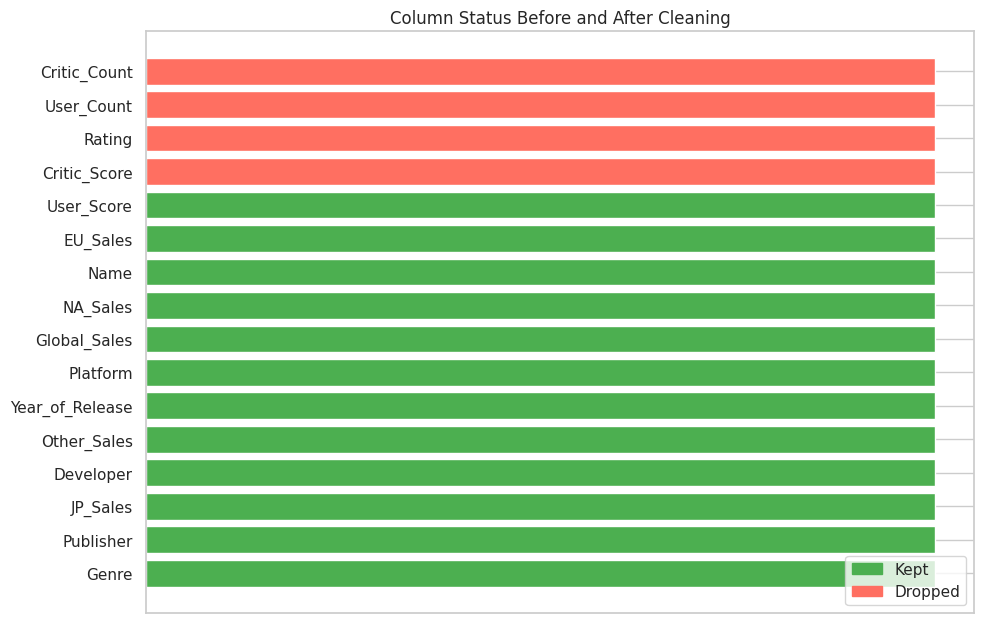

In [45]:
# Get before/after column lists
before_cols = set(vgsales.columns)
after_cols = set(vgsales_clean.columns)

# Determine dropped and kept columns
dropped_cols = list(before_cols - after_cols)
kept_cols = list(before_cols & after_cols)

# Prepare data
labels = kept_cols + dropped_cols
status = ['Kept'] * len(kept_cols) + ['Dropped'] * len(dropped_cols)
colors = ['#4CAF50' if s == 'Kept' else '#FF6F61' for s in status]

# Plot
plt.figure(figsize=(10, len(labels) * 0.4))
bars = plt.barh(labels, [1]*len(labels), color=colors)

# Add title and formatting
plt.title("Column Status Before and After Cleaning")
plt.xticks([])  # Hide x-axis
plt.tight_layout()

# Add legend
kept_patch = mpatches.Patch(color='#4CAF50', label='Kept')
dropped_patch = mpatches.Patch(color='#FF6F61', label='Dropped')
plt.legend(handles=[kept_patch, dropped_patch], loc='lower right')

plt.show()

As part of the data cleaning, I compared the columns before and after cleaning to show what was kept and what was removed. The original dataset had 16 columns, but after cleaning, only 12 were left. Columns like Rating, Critic_Score, Critic_Count, and User_Count were removed because they had too many missing values or weren’t needed for the project. This follows advice from Ahmed (2024b), who suggests removing unnecessary features to make the analysis simpler and clearer.

I used a horizontal bar chart where green bars represent columns kept and red bars show those removed as a visualisation. This was very helpful at comparing the data easily using bar length and colour, as McQuaid (2024a) recommends. The colours also follow good design rules from McQuaid (2024b), and the labels are clear, which matches McQuaid’s (2024c) tips on effective plotting. The chart avoids confusion or clutter, following McQuaid’s (2025d) advice.

The final dataset now has only the most useful and complete features, which makes the analysis clearer and easier to work with (Ahmed, 2024a).

#### Dataset shape before and after cleaning

In [36]:
# Before cleaning
print("Original shape of dataset:", vgsales.shape)

# After cleaning
print("Shape after cleaning:", vgsales_clean.shape)

Original shape of dataset: (16719, 16)
Shape after cleaning: (16663, 12)


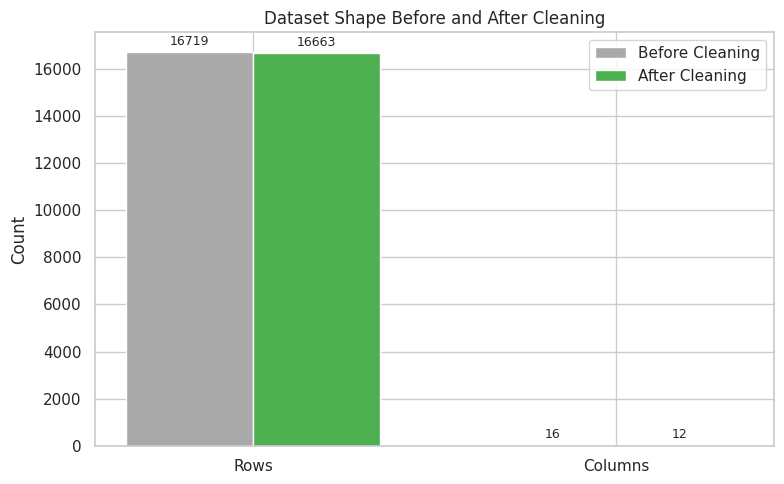

In [37]:
# Get shape info
before_rows, before_cols = vgsales.shape
after_rows, after_cols = vgsales_clean.shape

# Grouped bar data
labels = ['Rows', 'Columns']
before = [before_rows, before_cols]
after = [after_rows, after_cols]

x = range(len(labels))
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x, before, width, label='Before Cleaning', color='#A9A9A9')
bars2 = ax.bar([i + width for i in x], after, width, label='After Cleaning', color='#4CAF50')

# Labels and formatting
ax.set_ylabel('Count')
ax.set_title('Dataset Shape Before and After Cleaning')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(bars1, padding=3, fontsize=9)
ax.bar_label(bars2, padding=3, fontsize=9)
plt.tight_layout()
plt.show()


This grouped bar chart shows the number of rows and columns in the dataset before and after cleaning.

The original dataset had 16,719 rows and 16 column while after cleaning, it had 16,663 rows and 12 columns.

The small drop in rows happened because I removed records with missing values in important fields like Name, Genre, and Publisher. The bigger change was in the columns, where features like Rating, User_Count, Critic_Score, and Critic_Count were removed.

These columns were dropped because they didn’t help with the analysis questions or had too many missing values, making them unreliable. As Ahmed (2024b) suggests, removing less useful features helps reduce noise and keeps the analysis focused.

This visualisatoion follows Ahmed’s (2024a) advice to simplify data for better analysis and matches McQuaid’s (2024a) advice on using bar charts to compare things easily. The count labels and use of simple grey and green colours make the changes clear, following McQuaid’s (2024b, 2024c) best practices and avoiding the mistakes McQuaid (2025d) warns about

#### Missing Values

In [38]:
# Before cleaning
print("Missing values before cleaning:")
missing_before = vgsales.isnull().sum()
print(missing_before)

# After cleaning
print("\nMissing values after cleaning:")
missing_after = vgsales_clean.isnull().sum()
print(missing_after)

Missing values before cleaning:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Missing values after cleaning:
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
User_Score            0
Developer          6576
dtype: int64


In [39]:
# Before cleaning
print("\nPercentage missing before cleaning:")
print((missing_before / len(vgsales)) * 100)

# After cleaning
print("\nPercentage missing after cleaning:")
print((missing_after / len(vgsales_clean)) * 100)


Percentage missing before cleaning:
Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

Percentage missing after cleaning:
Name                0.000000
Platform            0.000000
Year_of_Release     0.000000
Genre               0.000000
Publisher           0.000000
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
User_Score          0.000000
Developer          39.464682
dtype: float64


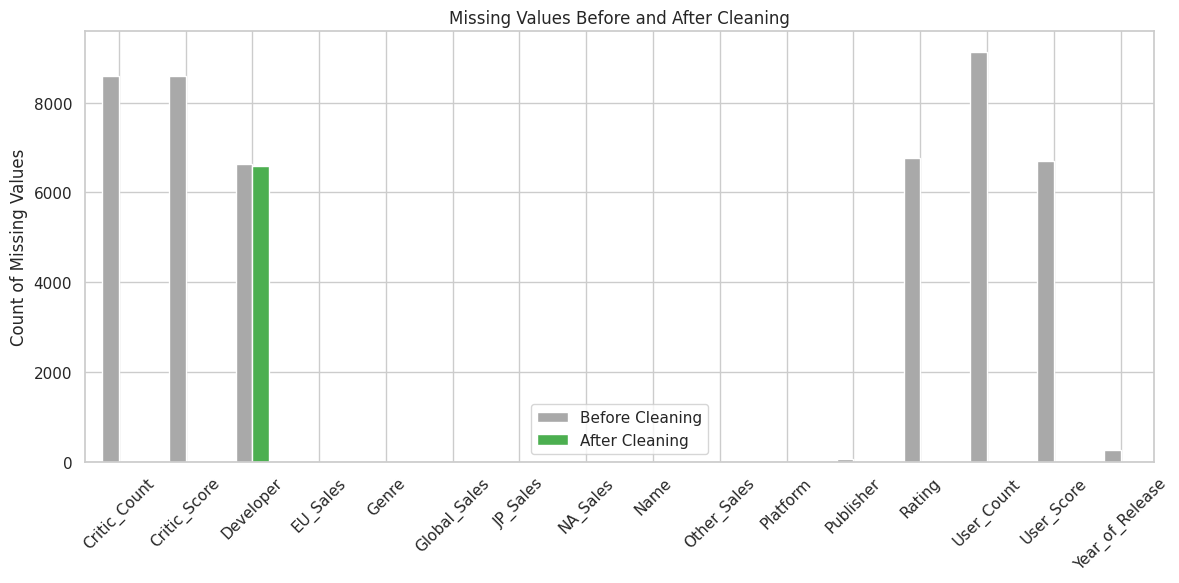

In [40]:
# Missing value counts
missing_before = vgsales.isnull().sum()
missing_after = vgsales_clean.isnull().sum()

# Combine into a single DataFrame for plotting
missing_df = pd.DataFrame({
    'Before Cleaning': missing_before,
    'After Cleaning': missing_after
})

# Set colors: grey for before, green for after
colors = ['#A9A9A9', '#4CAF50']

# Plot
missing_df.plot(kind='bar', figsize=(12,6), color=colors)
plt.title('Missing Values Before and After Cleaning')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To understand how missing data affected the dataset, I checked the number and percentage of missing values before and after cleaning. Before cleaning, several columns had a high percentage of missing data — for example, `User_Count` was missing 54%, `Critic_Score` and `Critic_Count` were each missing over 51%, and `Rating` had 40% missing. Other important columns like `Name`, `Genre`, and `Year_of_Release` had very few missing values (less than 2%).

I removed the columns with too much missing data and that weren’t needed for the project questions. These included `Rating`, `Critic_Score`, `Critic_Count`, and `User_Count`. For important columns like `Year_of_Release` and `User_Score`, I kept them and filled in the missing values using the mode and median. I also decided to keep the `Developer` column even though it still has missing values, because it's required for one of the analysis questions.

The bar chart shows the difference in missing values before and after cleaning. The green bars show cleaned columns, and grey bars show those that were either dropped or had no changes. This visual helps highlight the effectiveness of the cleaning process (Ahmed, 2024b). Following McQuaid’s (2024a) guidance, I used a clear chart format that makes comparison easy, and avoided cluttered or misleading visuals as warned against in McQuaid (2025d).

#### User_Score before and after cleaning

In [41]:
# Before: unique values (as strings)
print("User_Score unique values before conversion:")
print(vgsales['User_Score'].unique())

# After: should now be floats and NaNs only
print("User_Score unique values after cleaning:")
print(vgsales_clean['User_Score'].unique())

User_Score unique values before conversion:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
User_Score unique values after cleaning:
[8.  7.5 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8 6.9
 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5 4.4
 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5 2.1
 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1

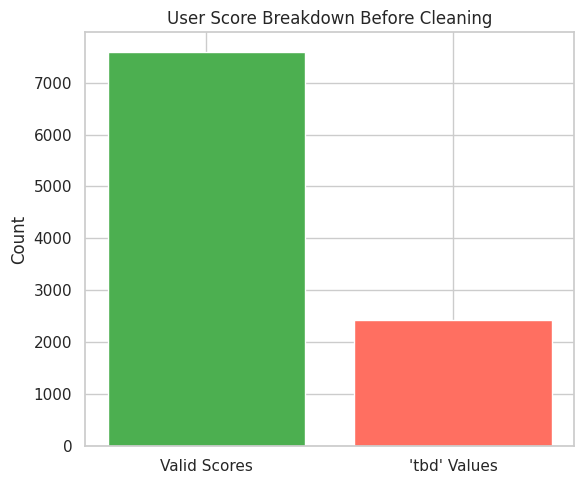

In [47]:
# Count of invalid entries before cleaning
invalid_count = (vgsales['User_Score'] == 'tbd').sum()
valid_count = vgsales['User_Score'].notna().sum() - invalid_count

# Plot
plt.figure(figsize=(6, 5))
plt.bar(['Valid Scores', "'tbd' Values"], [valid_count, invalid_count], color=['#4CAF50', '#FF6F61'])

plt.title("User Score Breakdown Before Cleaning")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The `User_Score` column had some bad values like `'tbd'` that couldn’t be used in calculations. This bar chart shows how many scores were real numbers and how many were `'tbd'` before cleaning.

To fix it, I changed the column to numeric, which turned the `'tbd'` values into missing values (`NaN`). Then I filled those in using the median score. This let me keep the column and still use it for analysis.

The chart helps show why this clean-up was needed and how much of the data had to be fixed (Ahmed, 2024b).

### Summary

In this section, I cleaned the dataset to get it ready for analysis. I didn’t find any duplicate rows, which was good. I checked for missing values and found that some columns like `Name` and `Genre` were only missing a few rows, so I dropped those. Other columns like `Rating` and `User_Count` had lots of missing data and weren’t useful for answering the assessment questions, so I dropped those too.

I fixed the `User_Score` column by turning it into a number and filling in the missing values using the median. I also filled in missing years of release using the most common year in the data. The `Developer` column had a lot of missing values, but I kept it because it’s needed for one of the questions.

Lastly, I changed some column types, like making sure the year was stored as a number, and I cleaned up text columns like `Platform` so everything is consistent. After all this, the dataset is now neat, complete, and ready for visualisation and analysis.

To support my decisions, I used several simple visualisations:
* A bar chart comparing missing values before and after cleaning
* A grouped bar chart showing how the dataset shape changed
* A horizontal bar chart showing which columns were dropped or kept
* A count chart showing how many `'tbd'` values were found in `User_Score`

These visuals made it easier to explain what I changed and why. They also helped ensure the cleaning process followed clear visual communication principles (Ahmed, 2024b; McQuaid, 2024a; McQuaid, 2024c).

## Feature Selection

During the data cleaning section, I picked which columns were useful for answering the four project questions. I removed columns with too much missing data or ones that weren’t needed for the analysis. These included:

* `Rating` (too much missing data, not needed)
* `User_Count`, `Critic_Score`, `Critic_Count` (not used in any questions)
* `Publisher` (not needed for analysis/assessment)

I kept only the columns that helped answer the questions:

* `Name`, `Global_Sales` → used for top 5 games
* `Genre` → needed for genre distribution
* `Year_of_Release`, `EU_Sales` → needed for comparing older vs newer games
* `Developer` → needed to find the most common developers

I also kept `User_Score` even though it wasn’t required for the main questions. I cleaned it by converting `'tbd'` to `NaN` and filling missing values with the median.
This made the dataset smaller, simpler, and focused only on the important info.
